In [5]:
%matplotlib inline 
from sklearn.datasets import load_boston
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
boston = load_boston()
from pylab import rcParams
#rcParams['figure.figsize'] = 15, 15
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [6]:
boston.keys()

dict_keys(['data', 'feature_names', 'target', 'DESCR'])

In [7]:
boston.data.shape

(506, 13)

In [8]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
bos = pd.DataFrame(boston.data)

In [10]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bos.columns = boston.feature_names

In [12]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
boston.target.shape

(506,)

In [14]:
bos["PRICE"] = boston.target

In [15]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


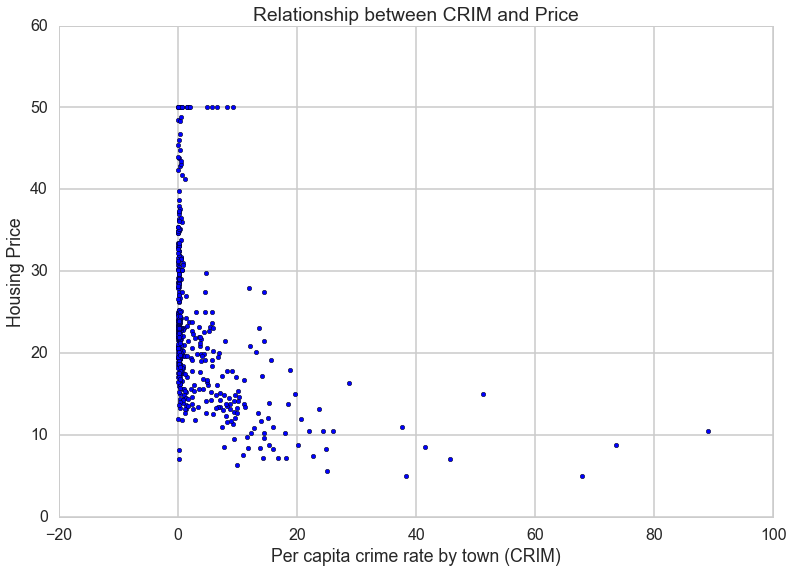

In [17]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

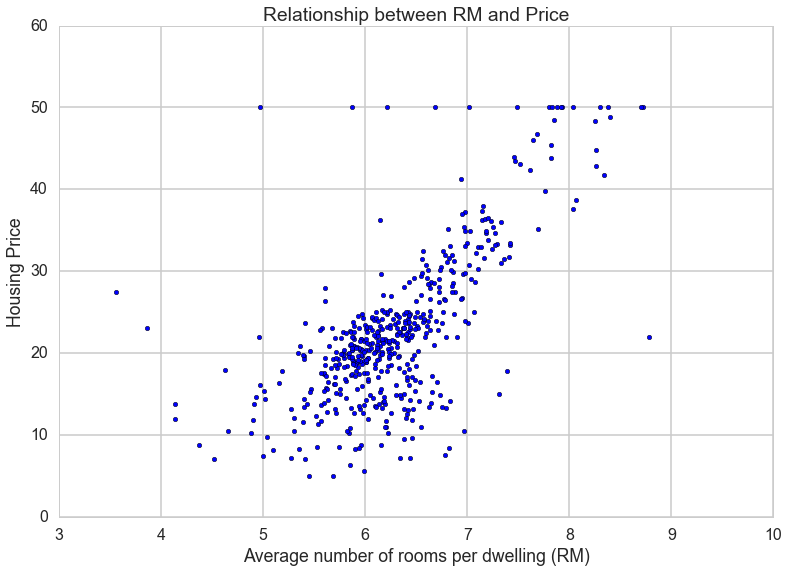

In [18]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

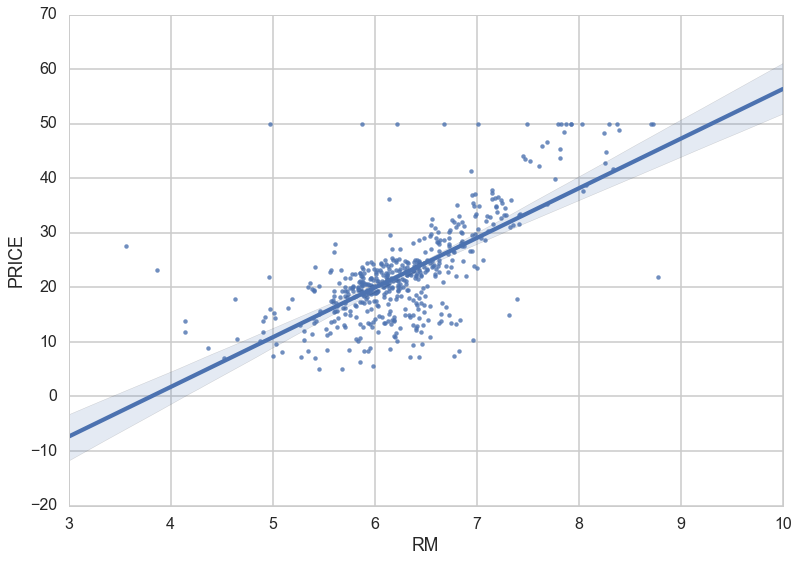

In [19]:
#we can also use seaborn to do this, and theres an attribute for fitting the regression line in the plot!
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

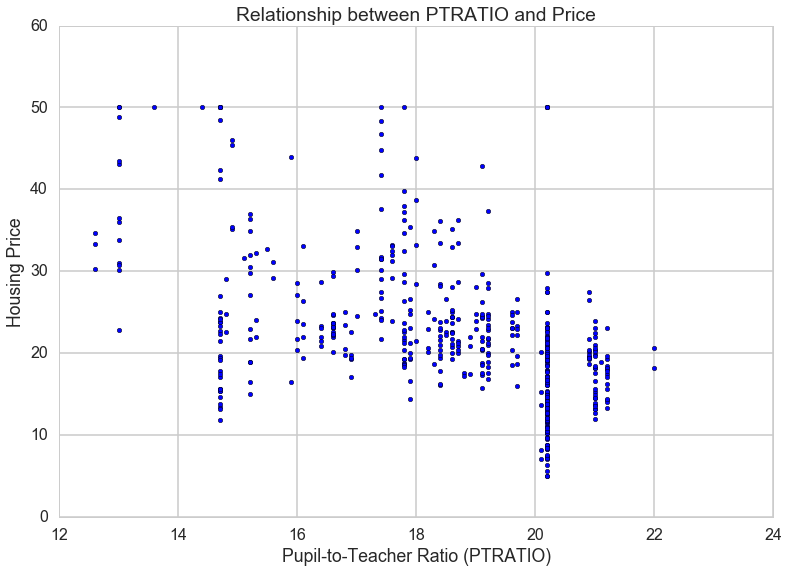

In [20]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

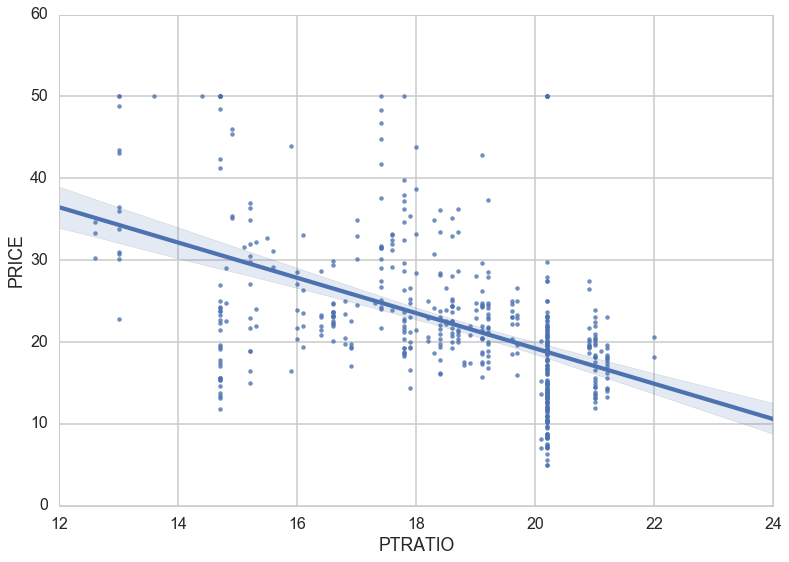

In [21]:
sns.regplot(y = "PRICE", x = "PTRATIO", data = bos, fit_reg = True)

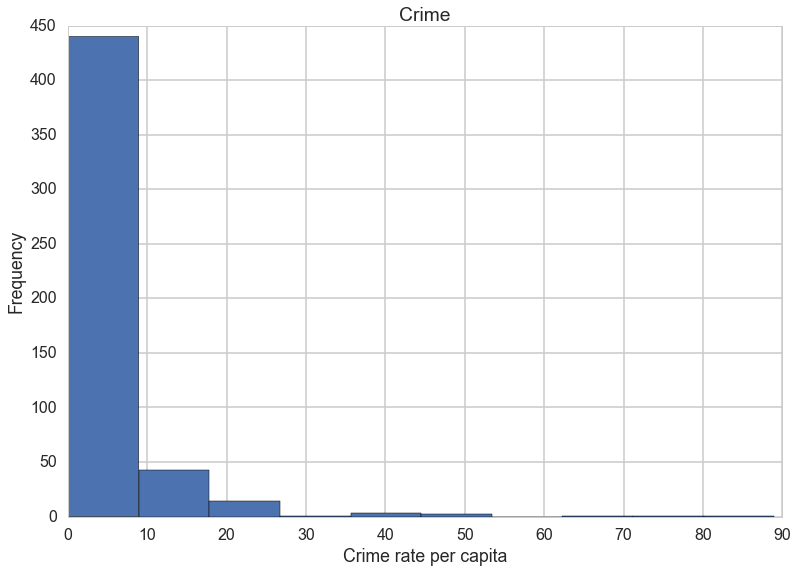

In [22]:
plt.hist(bos.CRIM)
plt.title("Crime")
plt.ylabel("Frequency")
plt.xlabel("Crime rate per capita")
plt.show()

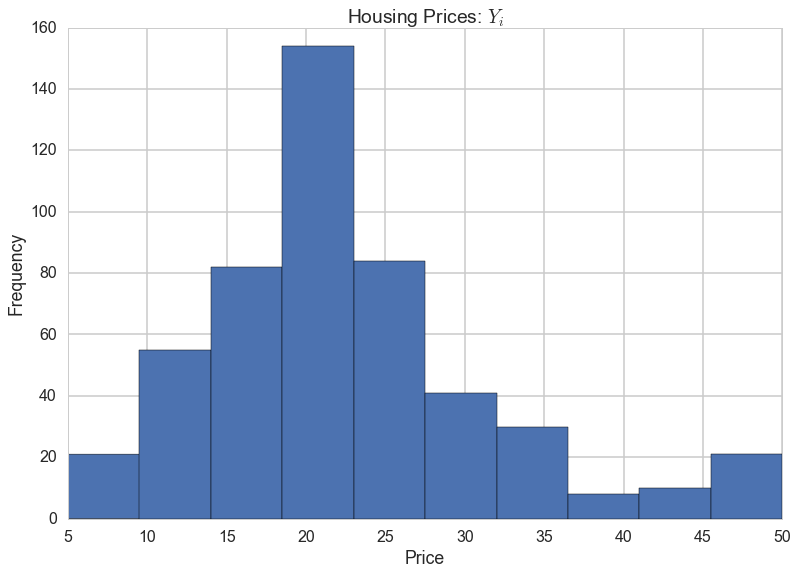

In [23]:
plt.hist(bos.PRICE)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Linear regression on Boston dataset

Here,
Y = boston housing prices (also called "target" data in python)
and
X = all the other features (or independent variables)
which we will use to fit a linear regression model and predict Boston housing prices. We will use the least squares method as the way to estimate the coefficients.
We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

In [24]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Fitting Linear Regression using statsmodels

In [30]:
#you need to have a pandas data frame for this to work.
#use method of least squares to fit the data
#in bracket we write the model, in left of ~ is the target and on the right are the predictor variables
#we give in the training set for the model to work.
m = ols("PRICE ~ RM", bos).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 01 Jun 2016   Prob (F-statistic):           2.49e-74
Time:                        16:11:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The coefficient that was estimated for RM is 9.1021 i.e. it is beta1.

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the RM coefficient (9.1021) by first noticing that the p-vale (under P>|t|) is so small, basically zero. We can interpret the coefficient as, if we compare two groups of towns, one where the average number of rooms is say 5 and the other group is the same except that they all have 6 rooms. For these two groups the average difference in house prives is about 9.1 (in thousands) so about $9,100 difference. The confidence interval fives us a range of plausible values for this difference, about ($8,279,$9,925), deffinitely not chump change.

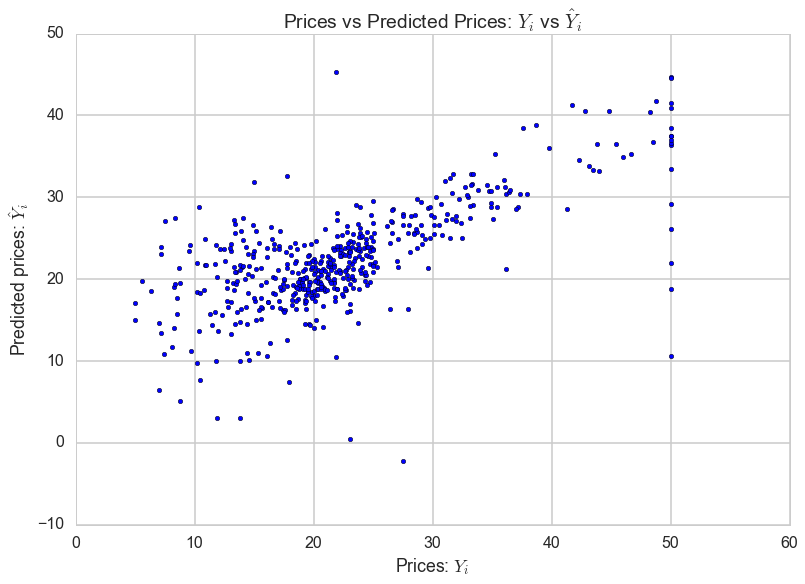

In [38]:
plt.scatter(bos["PRICE"], m.fittedvalues)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

#### As we can see above the plot is following a linear relationship!

## Now we do the same thing but using a different module, sklearn

In [62]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
#to check the estimated coefficients and the intercept use the commands given ahead.
#use the next line code if you do not want to estimate the intercept
#lm.fit_intercept = False
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
#the intercept term 
lm.intercept_

36.491103280361621

In [65]:
lm.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [71]:
pd.DataFrame(list(zip(X.columns, lm.coef_))
             , columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


The above are the coefficients in the linear regression model!

In [73]:
predicted_values = lm.predict(X)

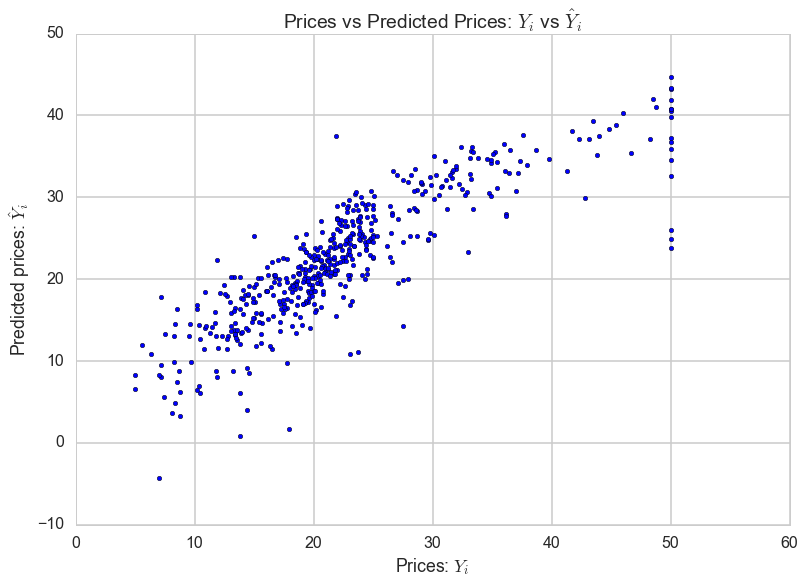

In [76]:
plt.scatter(bos["PRICE"], predicted_values)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Not as good as the previous model as we can see a slight curve in the middle....
Lets plot a histogram of the predicted values

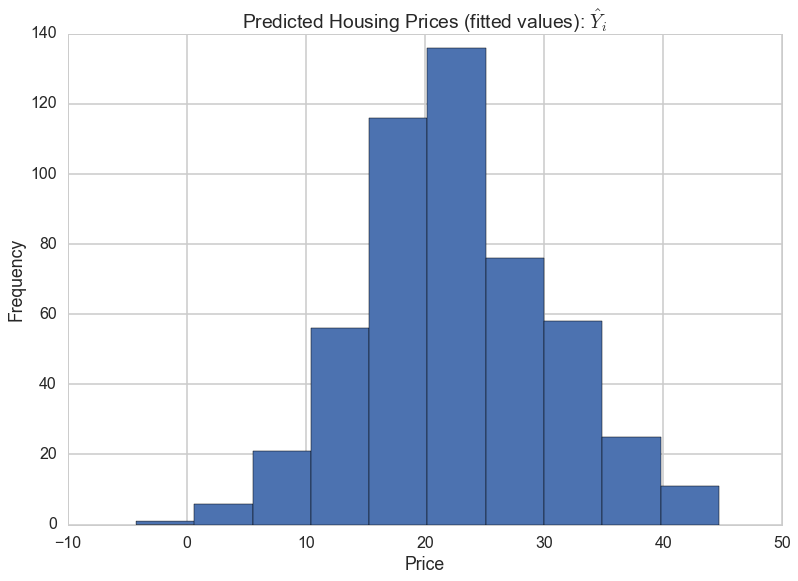

In [78]:
plt.hist(predicted_values)
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [81]:
import numpy as np
print (np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.2762841


In [82]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
mseFull

21.897779217687496

In [88]:
#fit the model using only one predictor variable, i.e. ptratio_pridict
lm.fit(X[['PTRATIO']], bos.PRICE)
lm.coef_

array([-2.1571753])

In [89]:
ptratio_pridict = lm.predict(X[['PTRATIO']])

In [91]:
#plt.scatter(bos.PRICE, ptratio_pridict)
ptratio_mean_error = np.mean((bos.PRICE - ptratio_pridict) ** 2)
ptratio_mean_error

62.652200013769274

Surely we cannot use ptratio to predict the model

71.852346665263369

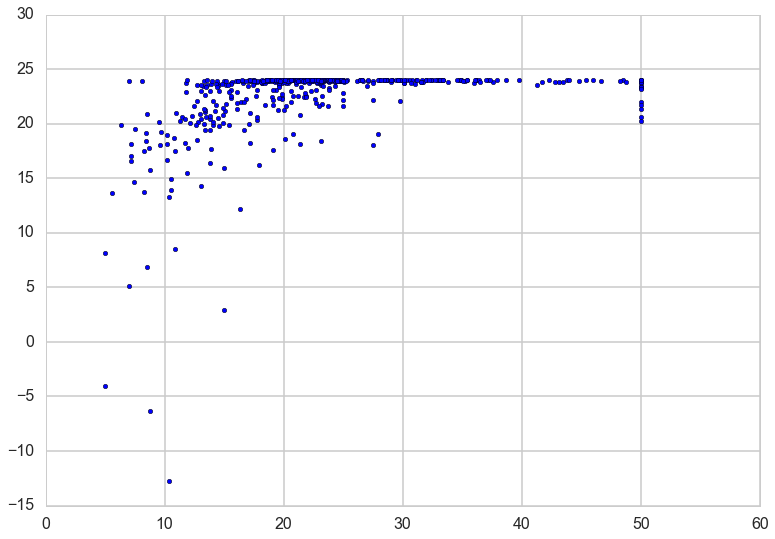

In [99]:
lm.fit(X[['CRIM']], bos.PRICE)
lm.fit_intercept = False
crim_predict = lm.predict(X[['CRIM']])
plt.scatter(bos.PRICE, crim_predict)
crim_mean = np.mean((bos.PRICE - crim_predict) ** 2)
crim_mean

## Training and Test Data sets

In [107]:
import sklearn
#test size is how much data should be in the testing data
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
#training data
print (X_train.shape)
#test data
print (X_test.shape)
#prices for the training data set 
print (Y_train.shape)
#prices for the test data set
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


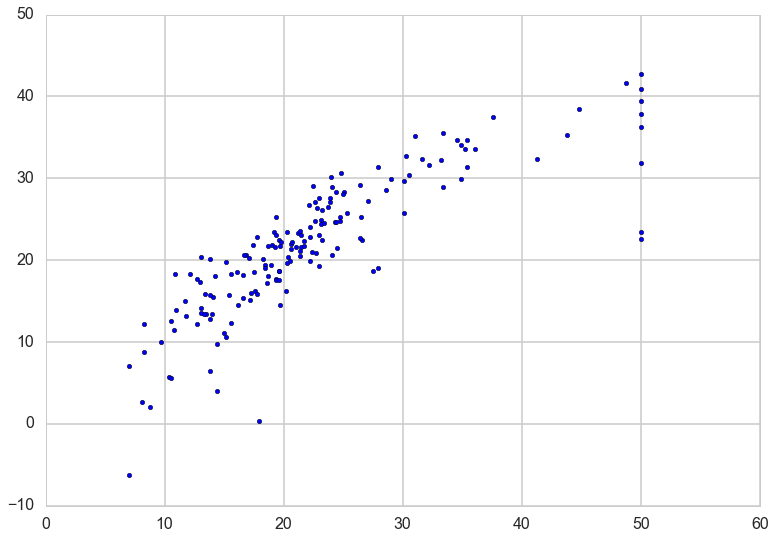

In [114]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_test = lm.predict(X_test)
pred_train = lm.predict(X_train)
plt.scatter(Y_test, pred_test)

As we can see its almost linear but not so much, so it not a nice model for predicting the values

In [117]:
# your turn
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.5467584735
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.5413672756


### Residual plots

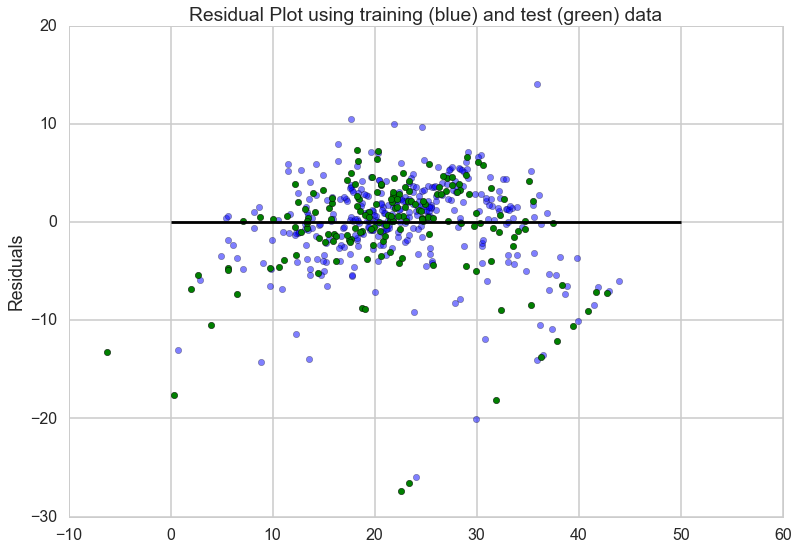

In [123]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
#the more concentration near zero, the more good is the model, as it just means that the difference between the 
#predicted values and the original values is zero, which make the model good and reliable!